In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

import pandas as pd
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = [20, 5]

import tensorflow as tf
tf.keras.backend.clear_session()

In [2]:
dataset = pd.read_csv('measurements.csv', sep=';', decimal=',')
dataset = dataset.dropna()
dataset.drop(dataset.columns[[0, 1, 2]], axis = 1, inplace = True) 
dataset.tail()

,age en mois,sexe (0=M/1=F),poids,Top epiglotte-CV,CV-cricoide,cricoide-carene,bronche souche droite,bronche souche gauche,antéro-post CV,AP cricoïde,transverse cricoïde,AP fin de trachée,T fin de trachée,AP début bronche souche droite,T début bronche souche droite,AP début BSG,T début BSG,AP fin BSD,T fin BSD,AP fin BSG,T fin BSG,plan glottique,aires cricoide,fin trachée,début BSD,début BSG
187,175.0,1.0,45.0,35.59,20.60,92.46,25.58,52.81,18.25,14.59,14.21,12.45,15.22,11.70,8.82,10.19,6.54,7.57,17.80,7.29,12.80,65.18,166.18,157.83,86.41,52.20
188,175.0,1.0,53.0,36.56,18.64,88.99,25.59,52.00,15.66,13.94,9.99,9.64,14.89,9.85,11.71,7.61,9.55,7.45,17.51,7.60,15.52,98.21,114.27,116.32,86.18,60.31
189,176.0,1.0,60.0,35.62,22.15,110.00,16.09,43.40,14.43,12.42,12.15,14.96,16.14,11.61,12.82,8.02,12.09,9.21,19.76,8.22,14.58,75.89,129.70,169.39,195.78,79.88
190,176.0,0.0,90.0,38.36,18.26,92.17,21.03,52.71,17.02,16.05,14.02,12.14,17.06,11.93,15.18,8.37,12.95,8.00,17.59,5.13,13.39,69.98,167.50,164.46,133.07,78.12
191,177.0,1.0,50.0,37.60,21.25,96.17,25.01,42.64,15.57,14.97,13.22,11.77,15.71,11.15,10.50,11.03,9.79,6.57,14.07,6.47,12.54,108.61,163.51,173.35,104.40,83.84


In [3]:
train_dataset = dataset.sample(frac=0.8, random_state=42)
test_dataset = dataset.drop(train_dataset.index)
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age en mois,154.0,85.993506,51.391169,1.00,36.0000,85.500,131.7500,176.00
sexe (0=M/1=F),154.0,0.350649,0.478730,0.00,0.0000,0.000,1.0000,1.00
poids,154.0,27.760390,15.704075,4.00,15.0000,25.000,36.5500,90.00
Top epiglotte-CV,154.0,28.644026,5.472268,16.18,25.0225,28.395,31.7525,47.18
CV-cricoide,154.0,13.094870,3.615462,5.98,10.4825,12.600,15.5850,22.15
cricoide-carene,154.0,76.257597,16.163420,42.76,64.2225,76.740,89.2725,116.40
bronche souche droite,154.0,17.799481,4.652095,8.77,14.4975,17.350,20.6275,35.53
bronche souche gauche,154.0,36.431883,6.972752,21.21,31.5100,35.915,41.2625,56.18
antéro-post CV,154.0,10.407597,2.691081,4.64,8.8475,10.060,11.7900,18.97
AP cricoïde,154.0,8.504610,2.422783,4.54,6.7950,8.125,9.9100,16.05


In [4]:
def plot_loss(history, name):
    plt.plot(history.history['loss'], label='mae')
    plt.plot(history.history['val_loss'], label='val_mae')
    #plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss [' + name + ']')
    plt.legend()
    plt.grid(True)
    
def plot_rmse(history, name):
    plt.plot(history.history['root_mean_squared_error'], label='rmse')
    plt.plot(history.history['val_root_mean_squared_error'], label='val_rmse')
    #plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('RMSE [' + name + ']')
    plt.legend()
    plt.grid(True)

In [5]:
train_features = train_dataset.copy()
train_ds_glottic = train_features.drop('AP cricoïde', axis=1)
train_target_glottic = train_ds_glottic.pop('antéro-post CV')

test_features = test_dataset.copy()
test_ds_glottic = test_features.drop('AP cricoïde', axis=1)
test_target_glottic = test_ds_glottic.pop('antéro-post CV')

In [6]:
normalizer_glottic = tf.keras.layers.experimental.preprocessing.Normalization()
normalizer_glottic.adapt(np.array(train_ds_glottic))

glottic_model = tf.keras.Sequential([
    normalizer_glottic,
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

# glottic_model.summary()

glottic_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=[tf.keras.metrics.RootMeanSquaredError(),
            tf.keras.metrics.MeanAbsoluteError()])

history = glottic_model.fit(x=train_ds_glottic, y=train_target_glottic,
                            validation_data=(test_ds_glottic, test_target_glottic),
                            epochs=300)

Epoch 1/300
5/5 [==============================] - 0s 25ms/step - loss: 127.0399 - root_mean_squared_error: 11.2712 - mean_absolute_error: 10.7437 - val_loss: 129.8145 - val_root_mean_squared_error: 11.3936 - val_mean_absolute_error: 10.8580
Epoch 2/300
5/5 [==============================] - 0s 4ms/step - loss: 119.6513 - root_mean_squared_error: 10.9385 - mean_absolute_error: 10.3988 - val_loss: 122.5378 - val_root_mean_squared_error: 11.0697 - val_mean_absolute_error: 10.5396
Epoch 3/300
5/5 [==============================] - 0s 4ms/step - loss: 112.7600 - root_mean_squared_error: 10.6189 - mean_absolute_error: 10.0572 - val_loss: 115.7437 - val_root_mean_squared_error: 10.7584 - val_mean_absolute_error: 10.2249
Epoch 4/300
5/5 [==============================] - 0s 4ms/step - loss: 106.2002 - root_mean_squared_error: 10.3053 - mean_absolute_error: 9.7082 - val_loss: 109.2652 - val_root_mean_squared_error: 10.4530 - val_mean_absolute_error: 9.9135
Epoch 5/300
5/5 [====================

Epoch 36/300
5/5 [==============================] - 0s 5ms/step - loss: 24.9884 - root_mean_squared_error: 4.9988 - mean_absolute_error: 4.2445 - val_loss: 27.9554 - val_root_mean_squared_error: 5.2873 - val_mean_absolute_error: 4.7676
Epoch 37/300
5/5 [==============================] - 0s 3ms/step - loss: 24.5836 - root_mean_squared_error: 4.9582 - mean_absolute_error: 4.2049 - val_loss: 27.5318 - val_root_mean_squared_error: 5.2471 - val_mean_absolute_error: 4.7294
Epoch 38/300
5/5 [==============================] - 0s 4ms/step - loss: 24.1825 - root_mean_squared_error: 4.9176 - mean_absolute_error: 4.1696 - val_loss: 27.1367 - val_root_mean_squared_error: 5.2093 - val_mean_absolute_error: 4.6937
Epoch 39/300
5/5 [==============================] - 0s 4ms/step - loss: 23.7976 - root_mean_squared_error: 4.8783 - mean_absolute_error: 4.1331 - val_loss: 26.7367 - val_root_mean_squared_error: 5.1708 - val_mean_absolute_error: 4.6564
Epoch 40/300
5/5 [==============================] - 0s 4

Epoch 71/300
5/5 [==============================] - 0s 4ms/step - loss: 10.4940 - root_mean_squared_error: 3.2395 - mean_absolute_error: 2.6990 - val_loss: 12.9041 - val_root_mean_squared_error: 3.5922 - val_mean_absolute_error: 3.1276
Epoch 72/300
5/5 [==============================] - 0s 4ms/step - loss: 10.1219 - root_mean_squared_error: 3.1815 - mean_absolute_error: 2.6519 - val_loss: 12.5019 - val_root_mean_squared_error: 3.5358 - val_mean_absolute_error: 3.0734
Epoch 73/300
5/5 [==============================] - 0s 4ms/step - loss: 9.7651 - root_mean_squared_error: 3.1249 - mean_absolute_error: 2.6036 - val_loss: 12.1433 - val_root_mean_squared_error: 3.4847 - val_mean_absolute_error: 3.0277
Epoch 74/300
5/5 [==============================] - 0s 4ms/step - loss: 9.4172 - root_mean_squared_error: 3.0687 - mean_absolute_error: 2.5531 - val_loss: 11.7727 - val_root_mean_squared_error: 3.4311 - val_mean_absolute_error: 2.9796
Epoch 75/300
5/5 [==============================] - 0s 4ms

Epoch 106/300
5/5 [==============================] - 0s 4ms/step - loss: 3.1996 - root_mean_squared_error: 1.7887 - mean_absolute_error: 1.5124 - val_loss: 4.9900 - val_root_mean_squared_error: 2.2338 - val_mean_absolute_error: 1.7798
Epoch 107/300
5/5 [==============================] - 0s 4ms/step - loss: 3.1122 - root_mean_squared_error: 1.7642 - mean_absolute_error: 1.4906 - val_loss: 4.8950 - val_root_mean_squared_error: 2.2125 - val_mean_absolute_error: 1.7640
Epoch 108/300
5/5 [==============================] - 0s 4ms/step - loss: 3.0420 - root_mean_squared_error: 1.7441 - mean_absolute_error: 1.4724 - val_loss: 4.8082 - val_root_mean_squared_error: 2.1928 - val_mean_absolute_error: 1.7492
Epoch 109/300
5/5 [==============================] - 0s 3ms/step - loss: 2.9690 - root_mean_squared_error: 1.7231 - mean_absolute_error: 1.4531 - val_loss: 4.7267 - val_root_mean_squared_error: 2.1741 - val_mean_absolute_error: 1.7367
Epoch 110/300
5/5 [==============================] - 0s 4ms/

Epoch 141/300
5/5 [==============================] - 0s 4ms/step - loss: 1.7525 - root_mean_squared_error: 1.3238 - mean_absolute_error: 1.0950 - val_loss: 3.4359 - val_root_mean_squared_error: 1.8536 - val_mean_absolute_error: 1.4908
Epoch 142/300
5/5 [==============================] - 0s 4ms/step - loss: 1.7319 - root_mean_squared_error: 1.3160 - mean_absolute_error: 1.0884 - val_loss: 3.4204 - val_root_mean_squared_error: 1.8494 - val_mean_absolute_error: 1.4867
Epoch 143/300
5/5 [==============================] - 0s 4ms/step - loss: 1.7187 - root_mean_squared_error: 1.3110 - mean_absolute_error: 1.0838 - val_loss: 3.4013 - val_root_mean_squared_error: 1.8443 - val_mean_absolute_error: 1.4770
Epoch 144/300
5/5 [==============================] - 0s 4ms/step - loss: 1.6974 - root_mean_squared_error: 1.3029 - mean_absolute_error: 1.0775 - val_loss: 3.3872 - val_root_mean_squared_error: 1.8404 - val_mean_absolute_error: 1.4750
Epoch 145/300
5/5 [==============================] - 0s 4ms/

Epoch 176/300
5/5 [==============================] - 0s 4ms/step - loss: 1.2765 - root_mean_squared_error: 1.1298 - mean_absolute_error: 0.9341 - val_loss: 3.0199 - val_root_mean_squared_error: 1.7378 - val_mean_absolute_error: 1.3755
Epoch 177/300
5/5 [==============================] - 0s 4ms/step - loss: 1.2696 - root_mean_squared_error: 1.1268 - mean_absolute_error: 0.9326 - val_loss: 3.0300 - val_root_mean_squared_error: 1.7407 - val_mean_absolute_error: 1.3744
Epoch 178/300
5/5 [==============================] - 0s 4ms/step - loss: 1.2557 - root_mean_squared_error: 1.1206 - mean_absolute_error: 0.9265 - val_loss: 3.0244 - val_root_mean_squared_error: 1.7391 - val_mean_absolute_error: 1.3694
Epoch 179/300
5/5 [==============================] - 0s 4ms/step - loss: 1.2485 - root_mean_squared_error: 1.1174 - mean_absolute_error: 0.9217 - val_loss: 3.0230 - val_root_mean_squared_error: 1.7387 - val_mean_absolute_error: 1.3631
Epoch 180/300
5/5 [==============================] - 0s 3ms/

Epoch 211/300
5/5 [==============================] - 0s 4ms/step - loss: 1.0114 - root_mean_squared_error: 1.0057 - mean_absolute_error: 0.8269 - val_loss: 2.8367 - val_root_mean_squared_error: 1.6842 - val_mean_absolute_error: 1.3345
Epoch 212/300
5/5 [==============================] - 0s 4ms/step - loss: 1.0041 - root_mean_squared_error: 1.0021 - mean_absolute_error: 0.8242 - val_loss: 2.8263 - val_root_mean_squared_error: 1.6812 - val_mean_absolute_error: 1.3394
Epoch 213/300
5/5 [==============================] - 0s 3ms/step - loss: 0.9952 - root_mean_squared_error: 0.9976 - mean_absolute_error: 0.8229 - val_loss: 2.8146 - val_root_mean_squared_error: 1.6777 - val_mean_absolute_error: 1.3416
Epoch 214/300
5/5 [==============================] - 0s 4ms/step - loss: 0.9922 - root_mean_squared_error: 0.9961 - mean_absolute_error: 0.8233 - val_loss: 2.8061 - val_root_mean_squared_error: 1.6751 - val_mean_absolute_error: 1.3431
Epoch 215/300
5/5 [==============================] - 0s 4ms/

Epoch 246/300
5/5 [==============================] - 0s 4ms/step - loss: 0.8323 - root_mean_squared_error: 0.9123 - mean_absolute_error: 0.7489 - val_loss: 2.6654 - val_root_mean_squared_error: 1.6326 - val_mean_absolute_error: 1.3149
Epoch 247/300
5/5 [==============================] - 0s 4ms/step - loss: 0.8296 - root_mean_squared_error: 0.9108 - mean_absolute_error: 0.7493 - val_loss: 2.6532 - val_root_mean_squared_error: 1.6289 - val_mean_absolute_error: 1.3213
Epoch 248/300
5/5 [==============================] - 0s 3ms/step - loss: 0.8252 - root_mean_squared_error: 0.9084 - mean_absolute_error: 0.7484 - val_loss: 2.6521 - val_root_mean_squared_error: 1.6285 - val_mean_absolute_error: 1.3174
Epoch 249/300
5/5 [==============================] - 0s 4ms/step - loss: 0.8227 - root_mean_squared_error: 0.9070 - mean_absolute_error: 0.7463 - val_loss: 2.6587 - val_root_mean_squared_error: 1.6305 - val_mean_absolute_error: 1.3128
Epoch 250/300
5/5 [==============================] - 0s 4ms/

Epoch 281/300
5/5 [==============================] - 0s 4ms/step - loss: 0.7160 - root_mean_squared_error: 0.8461 - mean_absolute_error: 0.6967 - val_loss: 2.5269 - val_root_mean_squared_error: 1.5896 - val_mean_absolute_error: 1.3013
Epoch 282/300
5/5 [==============================] - 0s 3ms/step - loss: 0.7050 - root_mean_squared_error: 0.8397 - mean_absolute_error: 0.6910 - val_loss: 2.5374 - val_root_mean_squared_error: 1.5929 - val_mean_absolute_error: 1.2881
Epoch 283/300
5/5 [==============================] - 0s 3ms/step - loss: 0.7071 - root_mean_squared_error: 0.8409 - mean_absolute_error: 0.6891 - val_loss: 2.5559 - val_root_mean_squared_error: 1.5987 - val_mean_absolute_error: 1.2879
Epoch 284/300
5/5 [==============================] - 0s 4ms/step - loss: 0.7026 - root_mean_squared_error: 0.8382 - mean_absolute_error: 0.6873 - val_loss: 2.5434 - val_root_mean_squared_error: 1.5948 - val_mean_absolute_error: 1.2971
Epoch 285/300
5/5 [==============================] - 0s 4ms/

Glottic MAE_val: 1.2755622863769531
Glottic RMSE_val: 1.5711274147033691


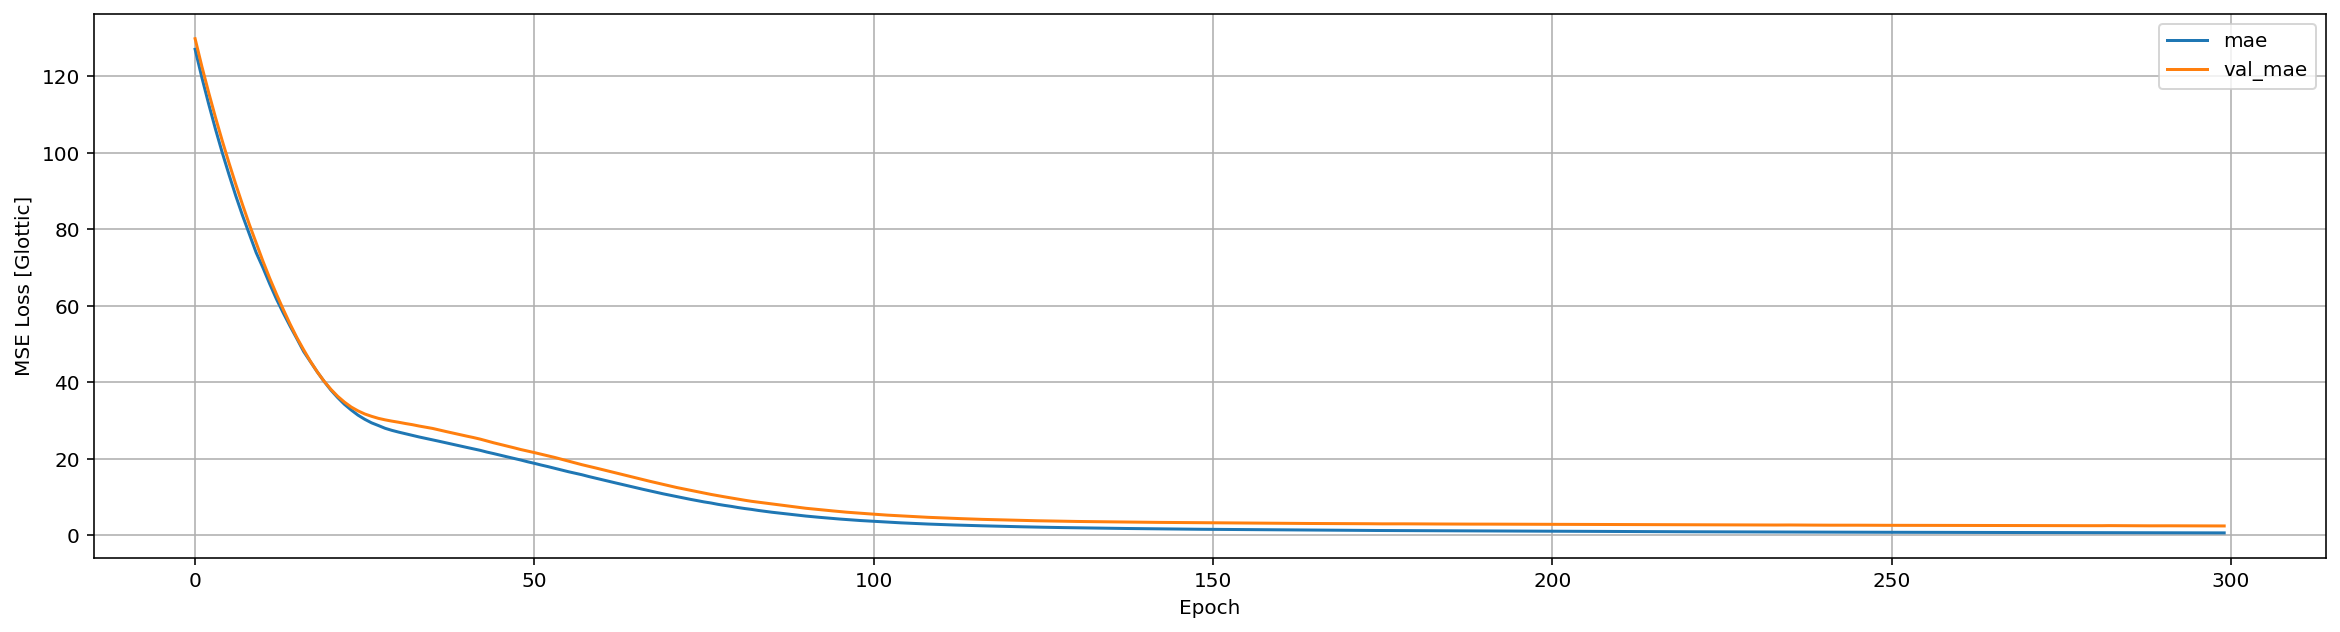

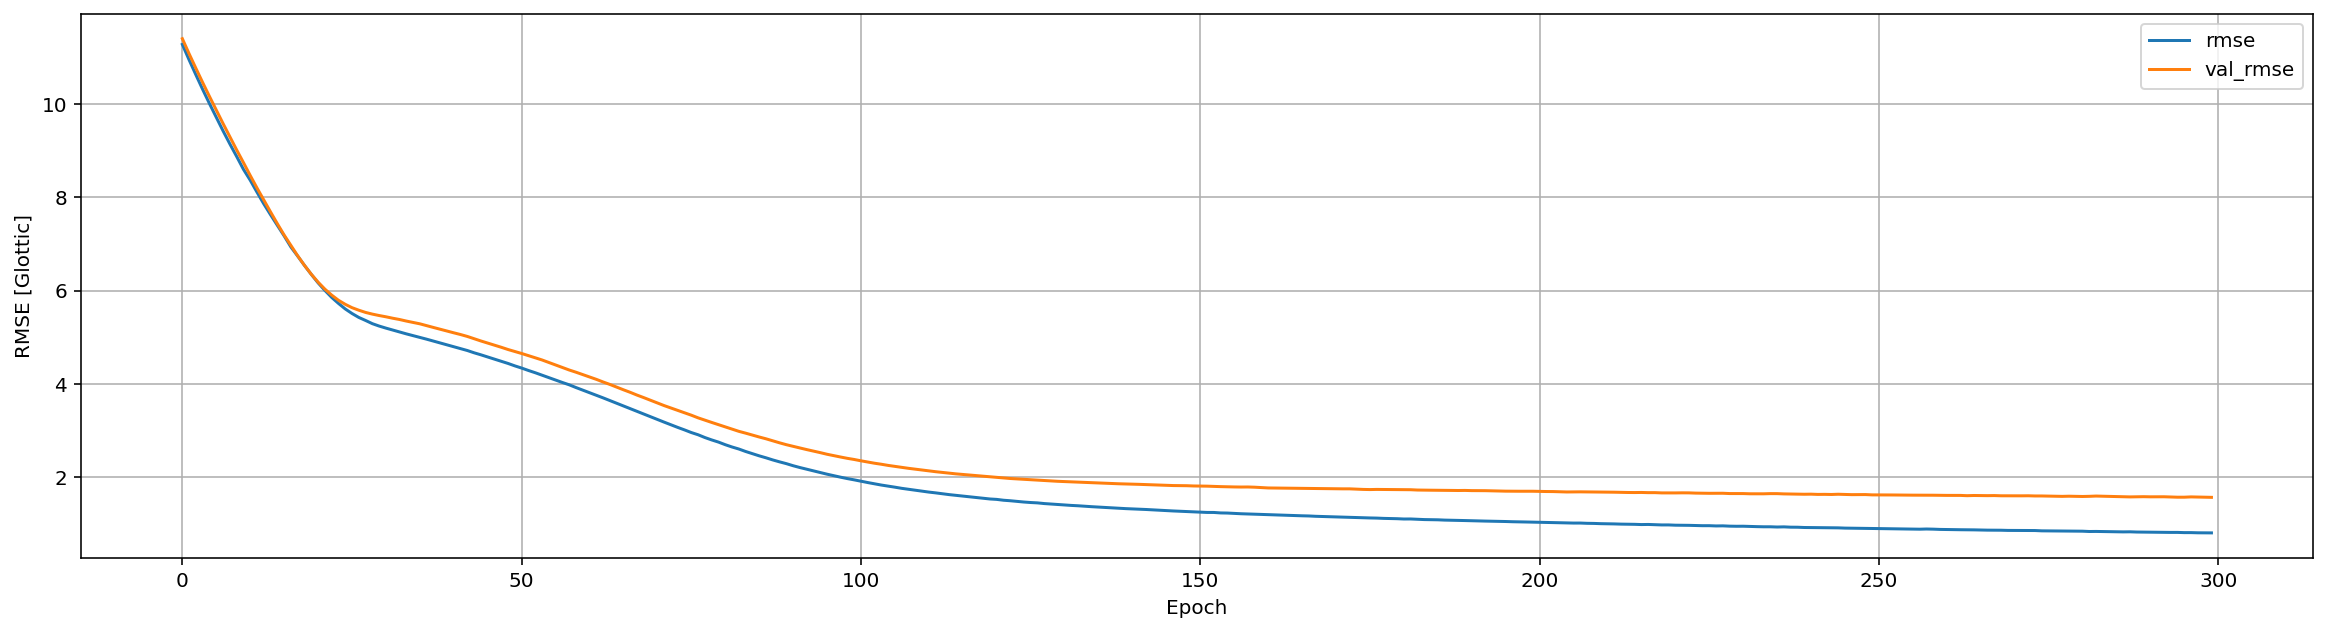

In [7]:
print('Glottic MAE_val: {}'.format(min(history.history['val_mean_absolute_error'])))
print('Glottic RMSE_val: {}'.format(min(history.history['val_root_mean_squared_error'])))

plot_loss(history, 'Glottic')
plt.show()
plot_rmse(history, 'Glottic')

In [8]:
train_features = train_dataset.copy()
train_ds_cricoid = train_features.drop('antéro-post CV', axis=1)
train_target_cricoid = train_ds_cricoid.pop('AP cricoïde')
# train_ds_cricoid = train_ds_cricoid['age en mois']

test_features = test_dataset.copy()
test_ds_cricoid = test_features.drop('antéro-post CV', axis=1)
test_target_cricoid = test_ds_cricoid.pop('AP cricoïde')
# test_ds_cricoid = test_ds_cricoid['age en mois']

In [9]:
normalizer_cricoid = tf.keras.layers.experimental.preprocessing.Normalization()
normalizer_cricoid.adapt(np.array(train_ds_cricoid))

cricoid_model = tf.keras.Sequential([
    normalizer_cricoid,
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

# cricoid_model.summary()

cricoid_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mse',
    metrics=[tf.keras.metrics.RootMeanSquaredError(),
            tf.keras.metrics.MeanAbsoluteError()])

checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


history = cricoid_model.fit(x=train_ds_cricoid, y=train_target_cricoid,
                            validation_data=(test_ds_cricoid, test_target_cricoid),
                            epochs=300)

Epoch 1/300
5/5 [==============================] - 0s 20ms/step - loss: 45.8240 - root_mean_squared_error: 6.7693 - mean_absolute_error: 5.8264 - val_loss: 34.4438 - val_root_mean_squared_error: 5.8689 - val_mean_absolute_error: 5.3072
Epoch 2/300
5/5 [==============================] - 0s 4ms/step - loss: 17.0388 - root_mean_squared_error: 4.1278 - mean_absolute_error: 3.4354 - val_loss: 7.7939 - val_root_mean_squared_error: 2.7917 - val_mean_absolute_error: 2.2805
Epoch 3/300
5/5 [==============================] - 0s 4ms/step - loss: 8.0682 - root_mean_squared_error: 2.8405 - mean_absolute_error: 2.2716 - val_loss: 11.1936 - val_root_mean_squared_error: 3.3457 - val_mean_absolute_error: 2.9248
Epoch 4/300
5/5 [==============================] - 0s 4ms/step - loss: 8.5637 - root_mean_squared_error: 2.9264 - mean_absolute_error: 2.1896 - val_loss: 10.1780 - val_root_mean_squared_error: 3.1903 - val_mean_absolute_error: 2.2773
Epoch 5/300
5/5 [==============================] - 0s 4ms/step

5/5 [==============================] - 0s 4ms/step - loss: 0.1273 - root_mean_squared_error: 0.3568 - mean_absolute_error: 0.2912 - val_loss: 0.6636 - val_root_mean_squared_error: 0.8146 - val_mean_absolute_error: 0.6969
Epoch 37/300
5/5 [==============================] - 0s 4ms/step - loss: 0.1244 - root_mean_squared_error: 0.3527 - mean_absolute_error: 0.2771 - val_loss: 0.7246 - val_root_mean_squared_error: 0.8512 - val_mean_absolute_error: 0.7010
Epoch 38/300
5/5 [==============================] - 0s 4ms/step - loss: 0.1200 - root_mean_squared_error: 0.3464 - mean_absolute_error: 0.2864 - val_loss: 0.6288 - val_root_mean_squared_error: 0.7930 - val_mean_absolute_error: 0.6673
Epoch 39/300
5/5 [==============================] - 0s 4ms/step - loss: 0.1375 - root_mean_squared_error: 0.3708 - mean_absolute_error: 0.2838 - val_loss: 0.7250 - val_root_mean_squared_error: 0.8514 - val_mean_absolute_error: 0.6917
Epoch 40/300
5/5 [==============================] - 0s 4ms/step - loss: 0.110

5/5 [==============================] - 0s 4ms/step - loss: 0.1098 - root_mean_squared_error: 0.3314 - mean_absolute_error: 0.2657 - val_loss: 0.5198 - val_root_mean_squared_error: 0.7210 - val_mean_absolute_error: 0.6087
Epoch 72/300
5/5 [==============================] - 0s 4ms/step - loss: 0.1368 - root_mean_squared_error: 0.3699 - mean_absolute_error: 0.2986 - val_loss: 0.8133 - val_root_mean_squared_error: 0.9018 - val_mean_absolute_error: 0.7024
Epoch 73/300
5/5 [==============================] - 0s 4ms/step - loss: 0.1602 - root_mean_squared_error: 0.4002 - mean_absolute_error: 0.3158 - val_loss: 0.5613 - val_root_mean_squared_error: 0.7492 - val_mean_absolute_error: 0.5950
Epoch 74/300
5/5 [==============================] - 0s 4ms/step - loss: 0.1376 - root_mean_squared_error: 0.3709 - mean_absolute_error: 0.2993 - val_loss: 0.6763 - val_root_mean_squared_error: 0.8224 - val_mean_absolute_error: 0.6651
Epoch 75/300
5/5 [==============================] - 0s 4ms/step - loss: 0.165

5/5 [==============================] - 0s 4ms/step - loss: 0.0577 - root_mean_squared_error: 0.2401 - mean_absolute_error: 0.1902 - val_loss: 0.4743 - val_root_mean_squared_error: 0.6887 - val_mean_absolute_error: 0.5607
Epoch 107/300
5/5 [==============================] - 0s 4ms/step - loss: 0.0766 - root_mean_squared_error: 0.2768 - mean_absolute_error: 0.2176 - val_loss: 0.6300 - val_root_mean_squared_error: 0.7937 - val_mean_absolute_error: 0.6490
Epoch 108/300
5/5 [==============================] - 0s 4ms/step - loss: 0.0676 - root_mean_squared_error: 0.2601 - mean_absolute_error: 0.2100 - val_loss: 0.4601 - val_root_mean_squared_error: 0.6783 - val_mean_absolute_error: 0.5588
Epoch 109/300
5/5 [==============================] - 0s 4ms/step - loss: 0.0647 - root_mean_squared_error: 0.2544 - mean_absolute_error: 0.1997 - val_loss: 0.5868 - val_root_mean_squared_error: 0.7660 - val_mean_absolute_error: 0.6124
Epoch 110/300
5/5 [==============================] - 0s 4ms/step - loss: 0

Epoch 141/300
5/5 [==============================] - 0s 3ms/step - loss: 0.2883 - root_mean_squared_error: 0.5370 - mean_absolute_error: 0.4352 - val_loss: 0.8757 - val_root_mean_squared_error: 0.9358 - val_mean_absolute_error: 0.7595
Epoch 142/300
5/5 [==============================] - 0s 4ms/step - loss: 0.2209 - root_mean_squared_error: 0.4700 - mean_absolute_error: 0.3756 - val_loss: 0.5150 - val_root_mean_squared_error: 0.7176 - val_mean_absolute_error: 0.5772
Epoch 143/300
5/5 [==============================] - 0s 4ms/step - loss: 0.1399 - root_mean_squared_error: 0.3741 - mean_absolute_error: 0.2945 - val_loss: 0.6885 - val_root_mean_squared_error: 0.8298 - val_mean_absolute_error: 0.6543
Epoch 144/300
5/5 [==============================] - 0s 3ms/step - loss: 0.1134 - root_mean_squared_error: 0.3367 - mean_absolute_error: 0.2660 - val_loss: 0.4868 - val_root_mean_squared_error: 0.6977 - val_mean_absolute_error: 0.5597
Epoch 145/300
5/5 [==============================] - 0s 4ms/

Epoch 176/300
5/5 [==============================] - 0s 4ms/step - loss: 0.1103 - root_mean_squared_error: 0.3322 - mean_absolute_error: 0.2622 - val_loss: 0.4477 - val_root_mean_squared_error: 0.6691 - val_mean_absolute_error: 0.5270
Epoch 177/300
5/5 [==============================] - 0s 4ms/step - loss: 0.1058 - root_mean_squared_error: 0.3253 - mean_absolute_error: 0.2547 - val_loss: 0.4110 - val_root_mean_squared_error: 0.6411 - val_mean_absolute_error: 0.5006
Epoch 178/300
5/5 [==============================] - 0s 4ms/step - loss: 0.0790 - root_mean_squared_error: 0.2811 - mean_absolute_error: 0.2287 - val_loss: 0.4655 - val_root_mean_squared_error: 0.6822 - val_mean_absolute_error: 0.5451
Epoch 179/300
5/5 [==============================] - 0s 4ms/step - loss: 0.0813 - root_mean_squared_error: 0.2851 - mean_absolute_error: 0.2186 - val_loss: 0.4665 - val_root_mean_squared_error: 0.6830 - val_mean_absolute_error: 0.5551
Epoch 180/300
5/5 [==============================] - 0s 4ms/

Epoch 211/300
5/5 [==============================] - 0s 4ms/step - loss: 0.2063 - root_mean_squared_error: 0.4542 - mean_absolute_error: 0.3576 - val_loss: 0.6355 - val_root_mean_squared_error: 0.7972 - val_mean_absolute_error: 0.6322
Epoch 212/300
5/5 [==============================] - 0s 3ms/step - loss: 0.1825 - root_mean_squared_error: 0.4273 - mean_absolute_error: 0.3425 - val_loss: 0.5462 - val_root_mean_squared_error: 0.7391 - val_mean_absolute_error: 0.6016
Epoch 213/300
5/5 [==============================] - 0s 4ms/step - loss: 0.1512 - root_mean_squared_error: 0.3889 - mean_absolute_error: 0.3200 - val_loss: 0.4408 - val_root_mean_squared_error: 0.6639 - val_mean_absolute_error: 0.5333
Epoch 214/300
5/5 [==============================] - 0s 4ms/step - loss: 0.1116 - root_mean_squared_error: 0.3341 - mean_absolute_error: 0.2713 - val_loss: 0.4023 - val_root_mean_squared_error: 0.6343 - val_mean_absolute_error: 0.5018
Epoch 215/300
5/5 [==============================] - 0s 3ms/

Epoch 246/300
5/5 [==============================] - 0s 4ms/step - loss: 0.0682 - root_mean_squared_error: 0.2611 - mean_absolute_error: 0.2083 - val_loss: 0.4247 - val_root_mean_squared_error: 0.6517 - val_mean_absolute_error: 0.5095
Epoch 247/300
5/5 [==============================] - 0s 4ms/step - loss: 0.0500 - root_mean_squared_error: 0.2237 - mean_absolute_error: 0.1768 - val_loss: 0.4157 - val_root_mean_squared_error: 0.6448 - val_mean_absolute_error: 0.5085
Epoch 248/300
5/5 [==============================] - 0s 5ms/step - loss: 0.0407 - root_mean_squared_error: 0.2018 - mean_absolute_error: 0.1551 - val_loss: 0.4842 - val_root_mean_squared_error: 0.6959 - val_mean_absolute_error: 0.5403
Epoch 249/300
5/5 [==============================] - 0s 4ms/step - loss: 0.0343 - root_mean_squared_error: 0.1851 - mean_absolute_error: 0.1395 - val_loss: 0.4101 - val_root_mean_squared_error: 0.6404 - val_mean_absolute_error: 0.5066
Epoch 250/300
5/5 [==============================] - 0s 4ms/

Epoch 281/300
5/5 [==============================] - 0s 4ms/step - loss: 0.0553 - root_mean_squared_error: 0.2352 - mean_absolute_error: 0.1857 - val_loss: 0.4637 - val_root_mean_squared_error: 0.6810 - val_mean_absolute_error: 0.5533
Epoch 282/300
5/5 [==============================] - 0s 3ms/step - loss: 0.0419 - root_mean_squared_error: 0.2046 - mean_absolute_error: 0.1520 - val_loss: 0.4290 - val_root_mean_squared_error: 0.6549 - val_mean_absolute_error: 0.5252
Epoch 283/300
5/5 [==============================] - 0s 4ms/step - loss: 0.0369 - root_mean_squared_error: 0.1921 - mean_absolute_error: 0.1487 - val_loss: 0.4495 - val_root_mean_squared_error: 0.6704 - val_mean_absolute_error: 0.5333
Epoch 284/300
5/5 [==============================] - 0s 4ms/step - loss: 0.0436 - root_mean_squared_error: 0.2088 - mean_absolute_error: 0.1642 - val_loss: 0.5009 - val_root_mean_squared_error: 0.7078 - val_mean_absolute_error: 0.5496
Epoch 285/300
5/5 [==============================] - 0s 3ms/

Cricoid MAE_val: 0.4832336902618408
Cricoid RMSE_val: 0.6090734601020813


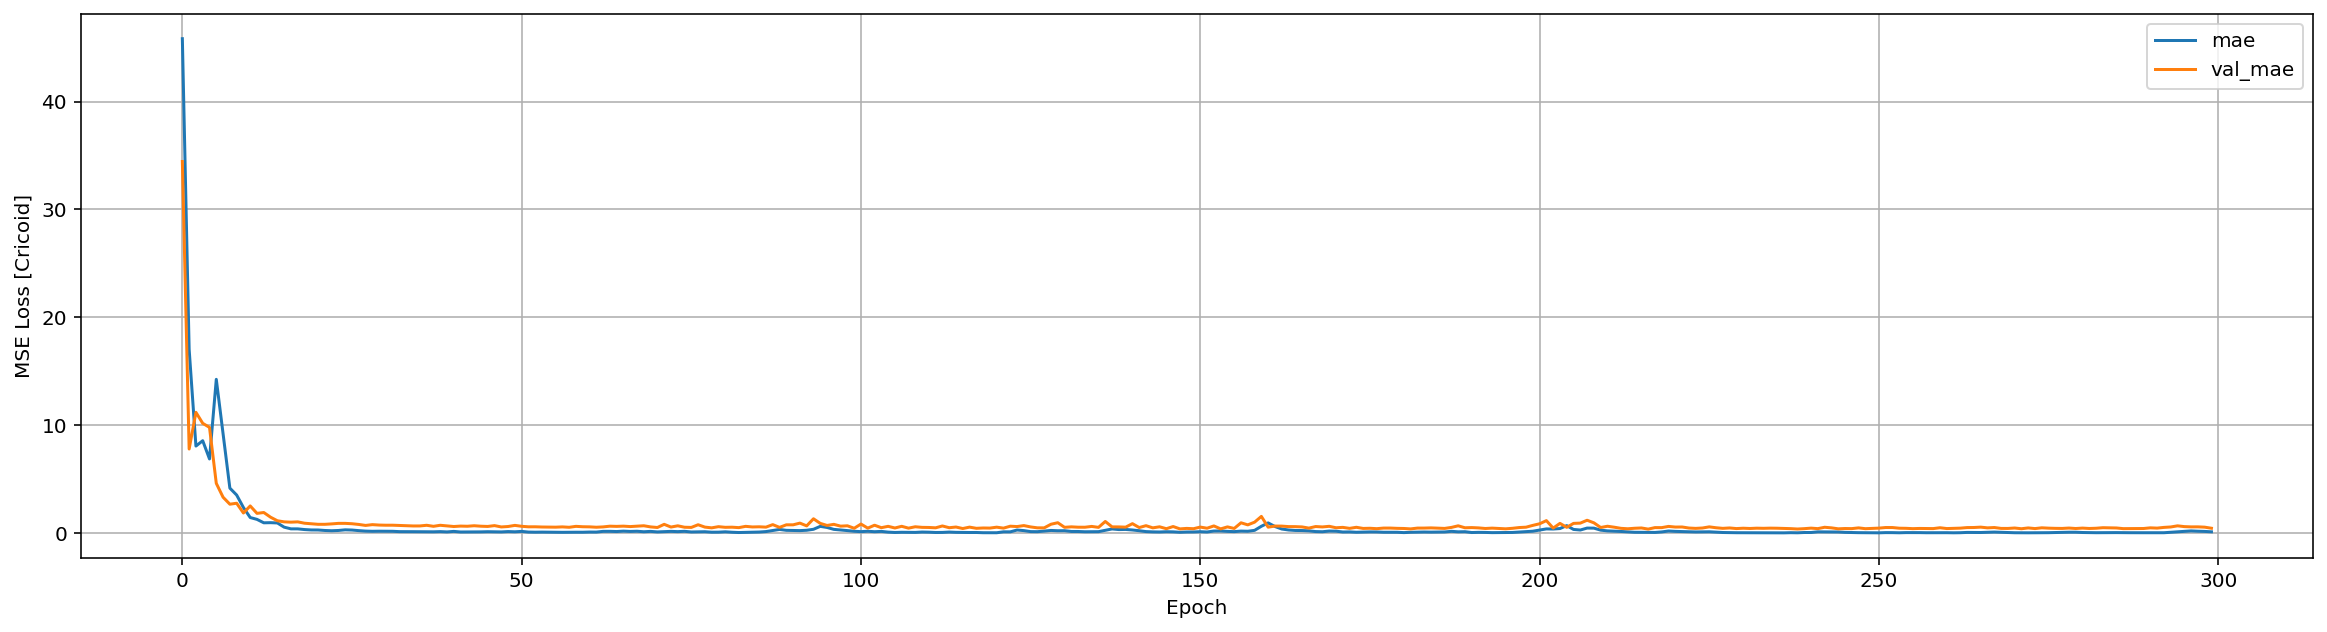

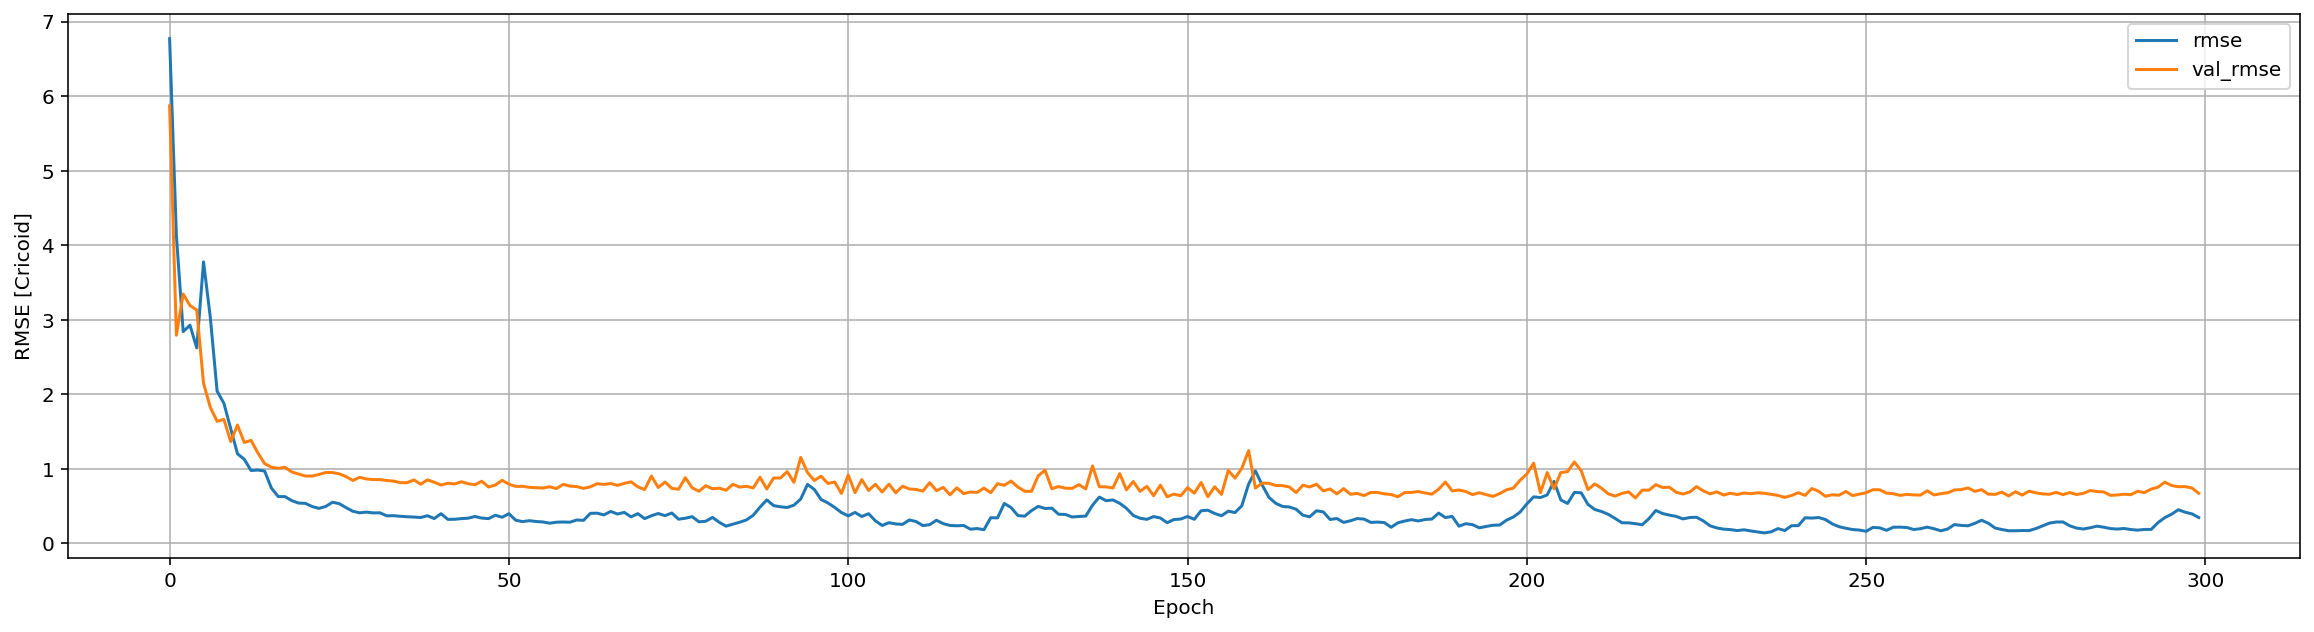

In [10]:
print('Cricoid MAE_val: {}'.format(min(history.history['val_mean_absolute_error'])))
print('Cricoid RMSE_val: {}'.format(min(history.history['val_root_mean_squared_error'])))

plot_loss(history, 'Cricoid')
plt.show()
plot_rmse(history, 'Cricoid')